# IMPORTANDO AS BIBLIOTECAS

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#CARREGANDO E VISUALIZANDO DATASET
Um sistema de visão computacional foi desenvolvido para distinguir sete diferentes variedades registradas de feijão seco com características semelhantes, a fim de obter uma classificação uniforme das sementes. Para o modelo de classificação, imagens de 13.611 grãos de 7 diferentes grãos secos registrados foram tiradas com uma câmera de alta resolução. As imagens de feijão obtidas por sistema de visão computacional foram submetidas às etapas de segmentação e extração de recursos, totalizando 16 recursos; 12 dimensões e 4 formas de forma, foram obtidas a partir dos grãos.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/jrandrade07/DataSets/main/Beans.csv")
df.head()

,Unnamed: 0,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


# ANALISANDO OS DADOS
Verificando a existência de campos nulos

In [ ]:
#Verificando se há valores nulos
df.isnull().sum()

Unnamed: 0         0
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [ ]:
#Verificando a quantidade e disbuição de classes
df.Class.value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

# PRE PROCESSAMENTO DOS DADOS

In [ ]:
X = scale(df.drop(columns=["Class"]))
print(X)

[[-1.73192356 -0.84074853 -1.1433189  ...  2.40217287  1.92572347
   0.83837103]
 [-1.73166905 -0.82918764 -1.01392388 ...  3.10089314  2.68970162
   0.77113842]
 [-1.73141454 -0.80715717 -1.07882906 ...  2.23509147  1.84135576
   0.91675514]
 ...
 [ 1.73141454 -0.37203825 -0.44783294 ...  0.28920441  0.33632829
   0.39025114]
 [ 1.73166905 -0.37176543 -0.42702856 ...  0.22837538  0.2489734
   0.03644001]
 [ 1.73192356 -0.37135619 -0.38755718 ... -0.12777587 -0.2764814
   0.71371948]]


In [ ]:
y = pd.get_dummies(df["Class"])
y.head(9)

,BARBUNYA,BOMBAY,CALI,DERMASON,HOROZ,SEKER,SIRA
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
5,0,0,0,0,0,1,0
6,0,0,0,0,0,1,0
7,0,0,0,0,0,1,0
8,0,0,0,0,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print('Cumprimento da dimensão matriz "X" correspondente: ', X.shape)
print('Cumprimento da dimensão matriz "y" correspondente: ', y.shape)

Cumprimento da dimensão matriz "X" correspondente:  (13611, 17)
Cumprimento da dimensão matriz "y" correspondente:  (13611, 7)


In [ ]:
model = keras.Sequential([layers.Dense(20, activation='relu', input_shape=[X.shape[1]]),
                          layers.Dense(10, activation='relu'),
                          # layers.Dense(10, activation='relu'),
                          layers.Dense(y.shape[1], activation='sigmoid'),])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                360       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 7)                 77        
                                                                 
Total params: 647
Trainable params: 647
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(
    X_train, y_train,
    batch_size=32,
    validation_split=0.4,
    epochs=10,
    verbose=1,)

Epoch 1/10
179/179 [==============================] - 1s 4ms/step - loss: 1.3236 - accuracy: 0.5537 - val_loss: 0.7076 - val_accuracy: 0.7539
Epoch 2/10
179/179 [==============================] - 0s 3ms/step - loss: 0.4936 - accuracy: 0.8216 - val_loss: 0.3702 - val_accuracy: 0.8633
Epoch 3/10
179/179 [==============================] - 0s 3ms/step - loss: 0.2961 - accuracy: 0.8940 - val_loss: 0.2589 - val_accuracy: 0.9008
Epoch 4/10
179/179 [==============================] - 0s 3ms/step - loss: 0.2051 - accuracy: 0.9374 - val_loss: 0.1783 - val_accuracy: 0.9515
Epoch 5/10
179/179 [==============================] - 0s 3ms/step - loss: 0.1290 - accuracy: 0.9731 - val_loss: 0.1109 - val_accuracy: 0.9745
Epoch 6/10
179/179 [==============================] - 1s 4ms/step - loss: 0.0791 - accuracy: 0.9839 - val_loss: 0.0775 - val_accuracy: 0.9824
Epoch 7/10
179/179 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 0.9865 - val_loss: 0.0644 - val_accuracy: 0.9822
Epoch 

In [ ]:
def display_acc_hist(history):
  history_df = pd.DataFrame(history.history)
  display(history_df.head())
  # Start the plot at epoch 0
  history_df.loc[0:, ['loss', 'val_loss']].plot()
  history_df.loc[0:, ['accuracy', 'val_accuracy']].plot()

  print(("Best Validation Loss: {:0.4f}" +\
        "\nBest Validation Accuracy: {:0.4f}")\
        .format(history_df['val_loss'].min(),
        history_df['val_accuracy'].max()))
  return

,loss,accuracy,val_loss,val_accuracy
0,1.323621,0.553709,0.707609,0.753870
1,0.493591,0.821554,0.370183,0.863290
2,0.296104,0.893982,0.258927,0.900813
3,0.205118,0.937369,0.178348,0.951456
4,0.128958,0.973058,0.110925,0.974547


Best Validation Loss: 0.0454
Best Validation Accuracy: 0.9858


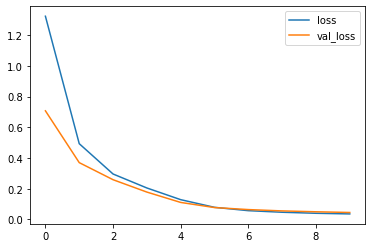

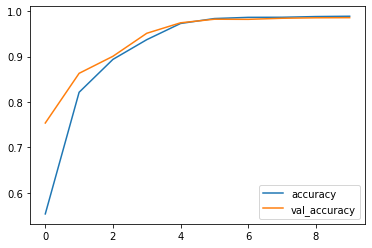

In [ ]:
display_acc_hist(history)

In [ ]:
model.predict(X_test)[0:5]

array([[2.9432178e-03, 2.6056819e-05, 2.0960927e-02, 9.9999934e-01,
        1.3370931e-02, 4.1673362e-01, 9.9940336e-01],
       [3.5976660e-01, 2.0431846e-02, 2.1566603e-01, 8.8427275e-01,
        1.8910888e-01, 1.4070749e-01, 9.9903548e-01],
       [9.9906158e-01, 9.9996889e-01, 9.8349762e-01, 2.4472723e-07,
        1.6349554e-03, 9.9861717e-01, 6.8174857e-01],
       [8.1890917e-01, 3.4512475e-01, 6.0322803e-01, 8.4936619e-04,
        6.7799062e-02, 9.9999821e-01, 8.4391594e-01],
       [2.4014235e-02, 8.8341381e-05, 1.5207678e-02, 9.9999958e-01,
        1.0810822e-02, 7.6698065e-03, 9.9986458e-01]], dtype=float32)

In [ ]:
y_test.head(5)

,BARBUNYA,BOMBAY,CALI,DERMASON,HOROZ,SEKER,SIRA
10676,0,0,0,1,0,0,0
9185,0,0,0,0,0,0,1
3357,0,1,0,0,0,0,0
806,0,0,0,0,0,1,0
13460,0,0,0,1,0,0,0


In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_test = np.argmax(y_test.values, axis=1)

def print_results(y_test, y_pred):
  print('Matriz de Confusão: \n' , confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  print('Acuracidade: ' , accuracy_score(y_test, y_pred))
  return
  
print_results(y_test, y_pred)

Matriz de Confusão: 
 [[ 377    0   13    0    0    5    0]
 [   0  155    0    0    0    0    0]
 [   7    1  474    0    4    3    0]
 [   0    0    0 1038    0    0    0]
 [   0    0    5    0  576    0    3]
 [  13    0    0    0    1  610    0]
 [   0    0    0    0    0    0  799]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       395
           1       0.99      1.00      1.00       155
           2       0.96      0.97      0.97       489
           3       1.00      1.00      1.00      1038
           4       0.99      0.99      0.99       584
           5       0.99      0.98      0.98       624
           6       1.00      1.00      1.00       799

    accuracy                           0.99      4084
   macro avg       0.98      0.98      0.98      4084
weighted avg       0.99      0.99      0.99      4084

Acuracidade:  0.9865328109696376


# CONCLUSÃO
Foi obtido nesse cenário uma acurácia de 98,68%, indicando que o modelo se adaptou bem aos dados.